In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 7.15MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [4]:
import kagglehub
import pandas as pd # Import the pandas library

# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)

# Cargar el dataset
df = pd.read_csv('/content/diabetes.csv')  # Ajusta la ruta si es necesario
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Configurar visualización
sns.set(style="whitegrid")

In [6]:
# Verificar duplicados
print(f"Duplicados en el dataset: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Mostrar tipos de datos
print(df.dtypes)

# Convertir tipos si es necesario (en este caso no es necesario cambiar)


Duplicados en el dataset: 0
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
# Verificar valores faltantes
print(df.isnull().sum())

# Imputación en caso de encontrar valores anómalos (en este dataset, reemplazamos ceros en algunas columnas)
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_impute:
    df[col].replace(0, np.nan, inplace=True)
    df[col].fillna(df[col].median(), inplace=True)  # Usamos la mediana para imputar

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<ipython-input-7-4b3cc6e2b9ef>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(0, np.nan, inplace=True)
<ipython-input-7-4b3cc6e2b9ef>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

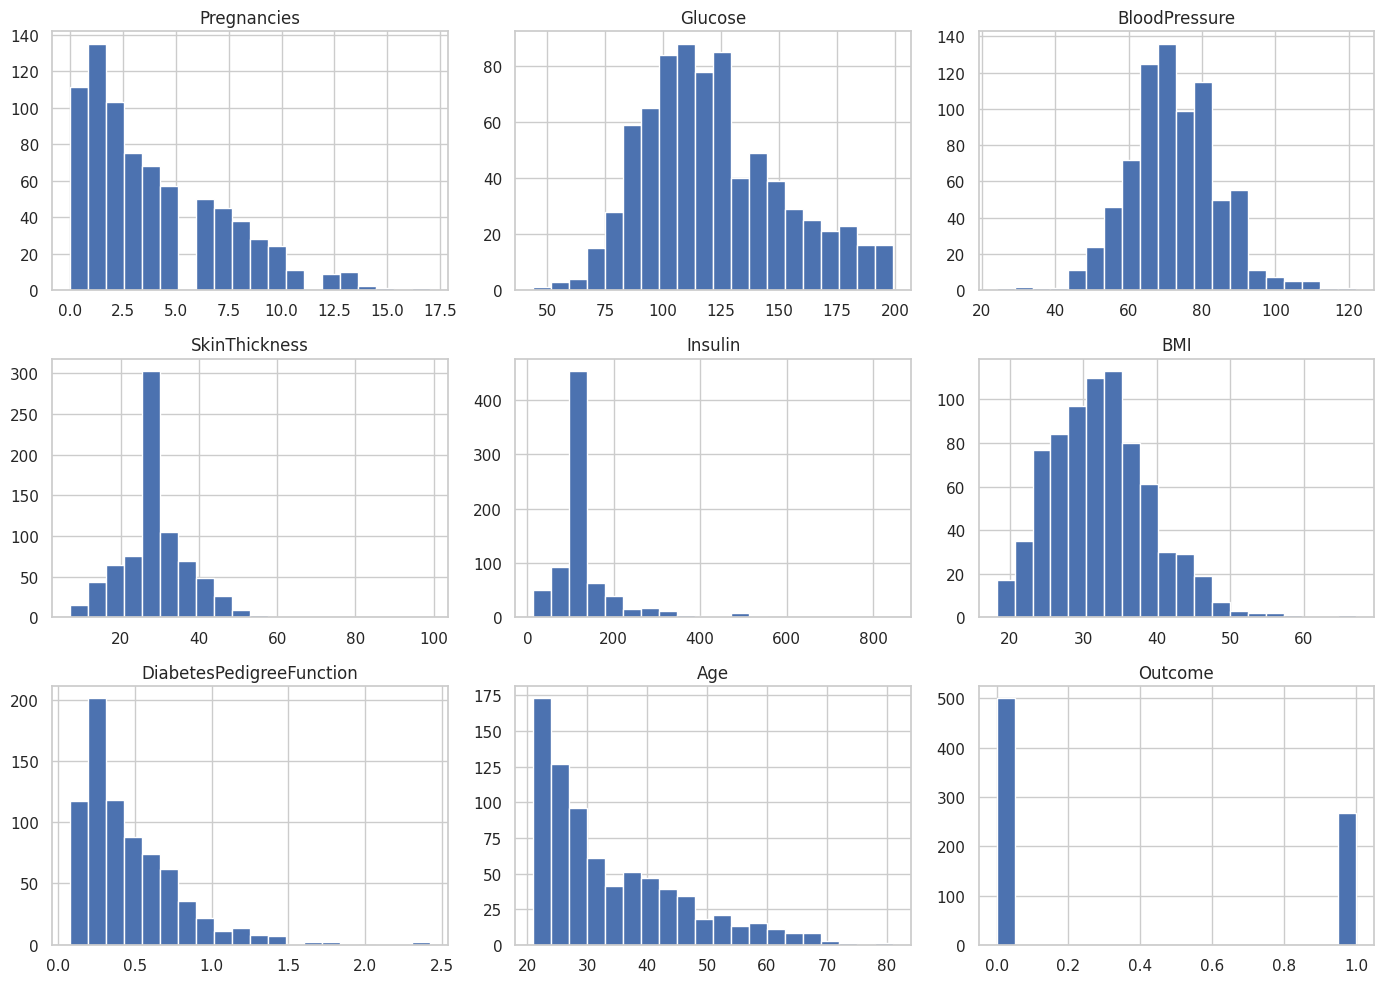

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

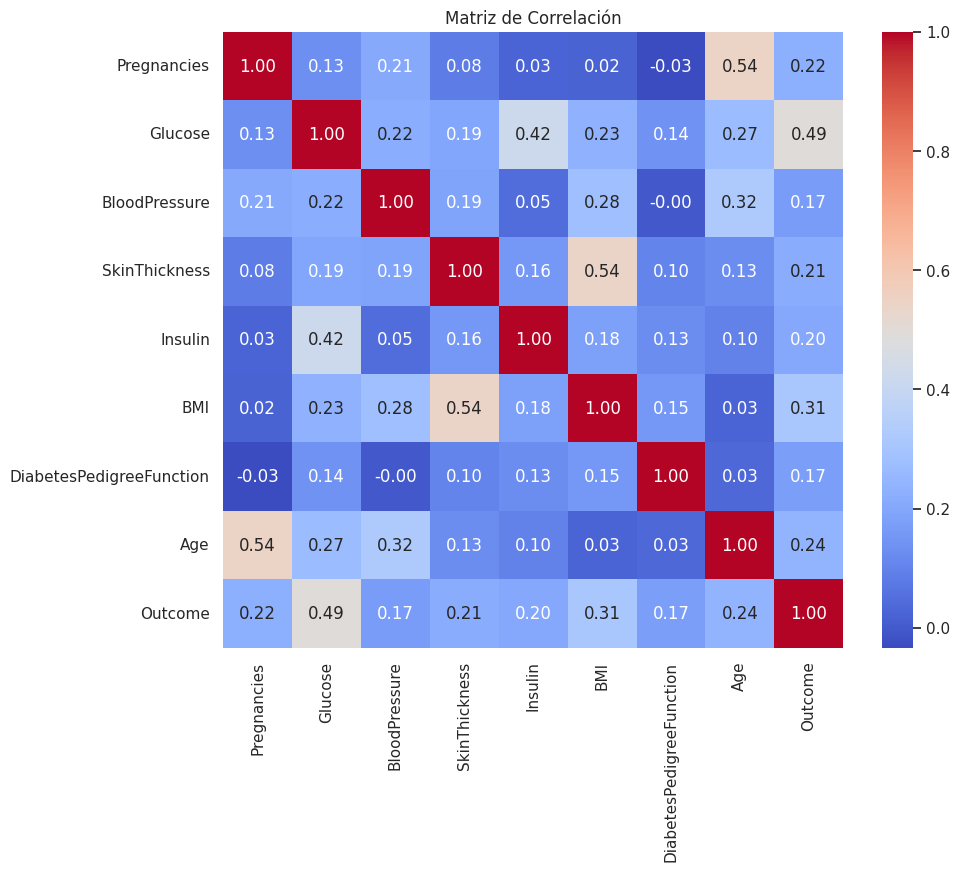

In [8]:
# Histograma para cada variable
df.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print(df.describe())

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [9]:
# Separar características y variable objetivo
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

# Entrenar modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))


Random Forest Metrics
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
ROC-AUC: 0.7303030303030302
XGBoost Metrics
Accuracy: 0.7142857142857143
Precision: 0.5873015873015873
Recall: 0.6727272727272727
F1 Score: 0.6271186440677966
ROC-AUC: 0.7050505050505051


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:27:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


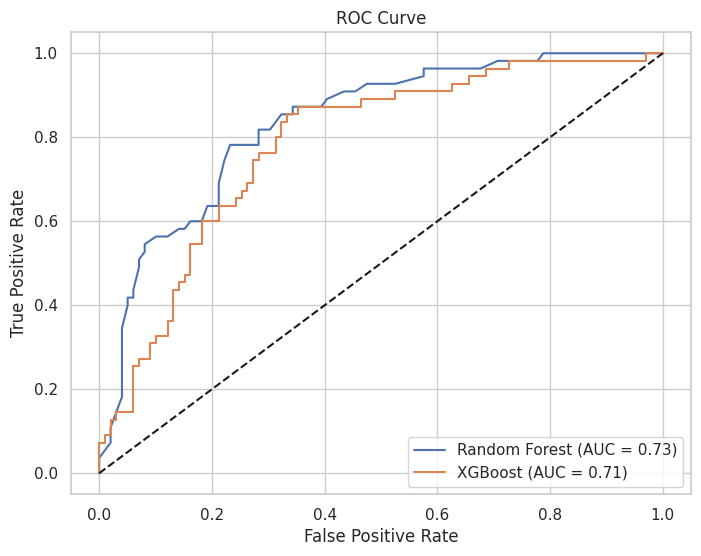

In [11]:
# Curva ROC para ambos modelos
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_rf)))
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = {:.2f})".format(roc_auc_score(y_test, y_pred_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


Conclusión: A medida que las métricas comparativas, el mejor modelo en términos de precisión, recuerdo, puntaje F1 y ROC-AUC fue Xub2 (--) durante el modelado, el conjunto de características explica por qué la diabetes se predice de manera más efectiva que para Xub2x (-5). Esto significa que (mencione los principales hallazgos de la predicción de la diabetes dentro del contexto del modelo de trabajo).

Recomendación: Sin embargo, debe tenerse en cuenta que el objetivo final es detectar con precisión los casos de diabetes, lo que significa que es esencial mejorar el modelo que logra un alto retiro al costo de cierta precisión. En otros estudios, es útil sintonizar algunos hiperparámetros y sesgar las clases si surge la necesidad.